In [32]:
from function_ei import (
    generate_random_graph,
    random_probability_vector,
    simulate_many_runs,
    simulate_many_runs_degree
)

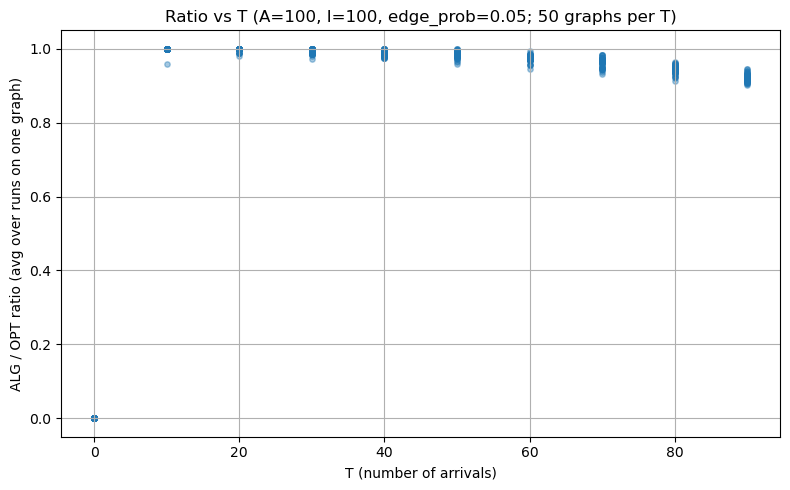

In [20]:
# ========= Scatter: ratio vs T =========
import matplotlib.pyplot as plt

A_size = 100
I_size = 100
edge_prob = 0.05
num_graphs_per_T = 50   # 每个 T 随机生成的图数量
um_runs_per_graph = 5 # 每张图跑的次数
# 如果前面没有定义 num_runs_per_graph，就给个默认值
try:
    runs_per_graph = num_runs_per_graph
except NameError:
    runs_per_graph = 20

Ts = []
ratios_T = []

for T in range(0, 100,10):  # T 从 0 到 100
    for _ in range(num_graphs_per_T):
        # 生成随机图和到达分布
        neighbors = generate_random_graph(A_size, I_size, edge_prob)
        p = random_probability_vector(I_size)

        # 对这张图多次跑 TSM，得到这个图在该 T 下的平均 ratio
        avg_ratio, _ = simulate_many_runs_degree(
            A_size,
            I_size,
            neighbors,
            p,
            T,
            num_runs=runs_per_graph,
        )

        Ts.append(T)
        ratios_T.append(avg_ratio)

# 画散点图
plt.figure(figsize=(8, 5))
plt.scatter(Ts, ratios_T, s=15, alpha=0.4)
plt.xlabel("T (number of arrivals)")
plt.ylabel("ALG / OPT ratio (avg over runs on one graph)")
plt.title("Ratio vs T (A=100, I=100, edge_prob=0.05; 50 graphs per T)")
plt.grid(True)
plt.tight_layout()
plt.show()


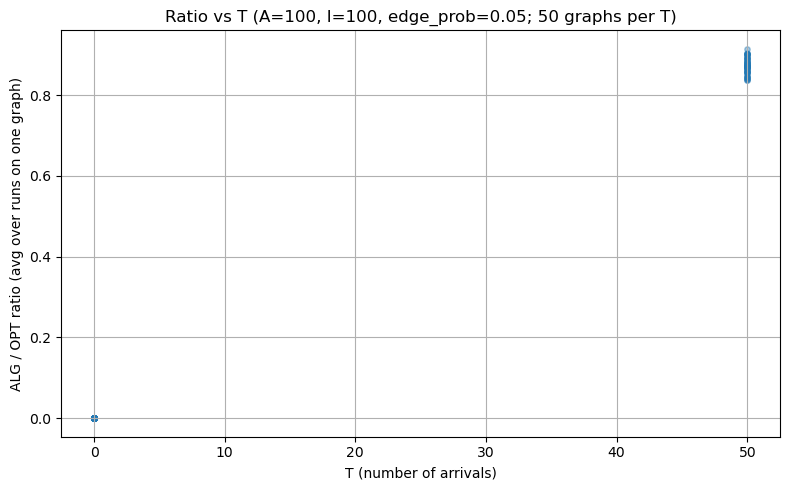

In [ ]:
# ========= Scatter: ratio vs T =========
import matplotlib.pyplot as plt

A_size = 1000
I_size = 100
edge_prob = 0.05
num_graphs_per_T = 50   # 每个 T 随机生成的图数量
um_runs_per_graph = 5 # 每张图跑的次数
# 如果前面没有定义 num_runs_per_graph，就给个默认值
try:
    runs_per_graph = num_runs_per_graph
except NameError:
    runs_per_graph = 20

Ts = []
ratios_T = []

for T in range(0, 100,50):  # T 从 0 到 100
    for _ in range(num_graphs_per_T):
        # 生成随机图和到达分布
        neighbors = generate_random_graph(A_size, I_size, edge_prob)
        p = random_probability_vector(I_size)

        # 对这张图多次跑 TSM，得到这个图在该 T 下的平均 ratio
        avg_ratio, _ = simulate_many_runs(
            A_size,
            I_size,
            neighbors,
            p,
            T,
            num_runs=runs_per_graph,
        )

        Ts.append(T)
        ratios_T.append(avg_ratio)

# 画散点图
plt.figure(figsize=(8, 5))
plt.scatter(Ts, ratios_T, s=15, alpha=0.4)
plt.xlabel("T (number of arrivals)")
plt.ylabel("ALG / OPT ratio (avg over runs on one graph)")
plt.title("Ratio vs T (A=100, I=100, edge_prob=0.05; 50 graphs per T)")
plt.grid(True)
plt.tight_layout()
plt.show()


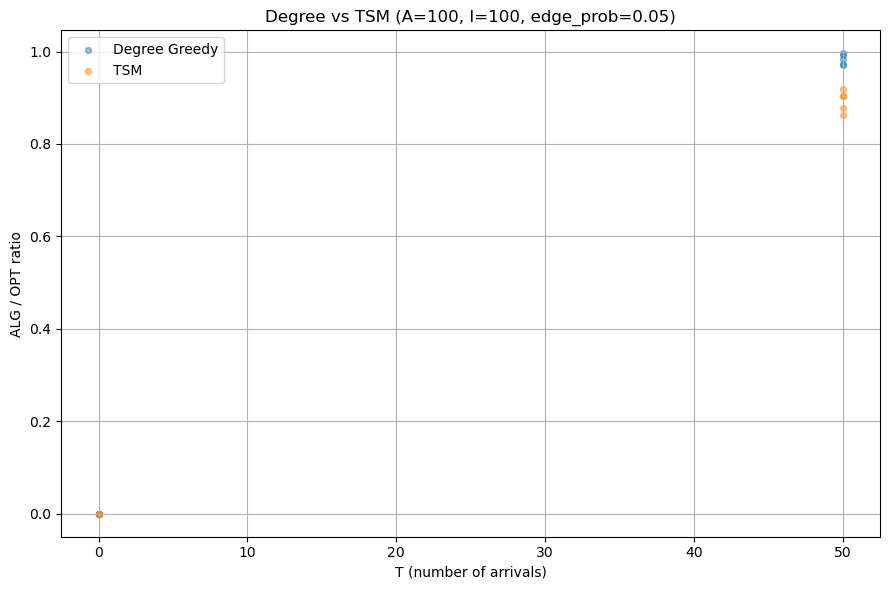

In [27]:
import matplotlib.pyplot as plt

A_size = 100
I_size = 100
edge_prob = 0.05

num_graphs_per_T = 5
runs_per_graph = 5   # 每张图重复次数

Ts = []
ratios_deg = []
ratios_tsm = []


for T in range(0, 100, 50):

    for _ in range(num_graphs_per_T):

        neighbors = generate_random_graph(A_size, I_size, edge_prob)
        p = random_probability_vector(I_size)

        # -------- Degree Matching --------
        avg_ratio_deg, _ = simulate_many_runs_degree(
            A_size, I_size, neighbors, p, T, num_runs=runs_per_graph
        )

        # -------- TSM --------
        avg_ratio_tsm, _ = simulate_many_runs(
            A_size, I_size, neighbors, p, T, num_runs=runs_per_graph
        )

        Ts.append(T)
        ratios_deg.append(avg_ratio_deg)
        ratios_tsm.append(avg_ratio_tsm)


# ---------- Plot ----------
plt.figure(figsize=(9, 6))

plt.scatter(Ts, ratios_deg, s=18, alpha=0.45, label="Degree Greedy")
plt.scatter(Ts, ratios_tsm, s=18, alpha=0.45, label="TSM")

plt.xlabel("T (number of arrivals)")
plt.ylabel("ALG / OPT ratio")
plt.title("Degree vs TSM (A=100, I=100, edge_prob=0.05)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


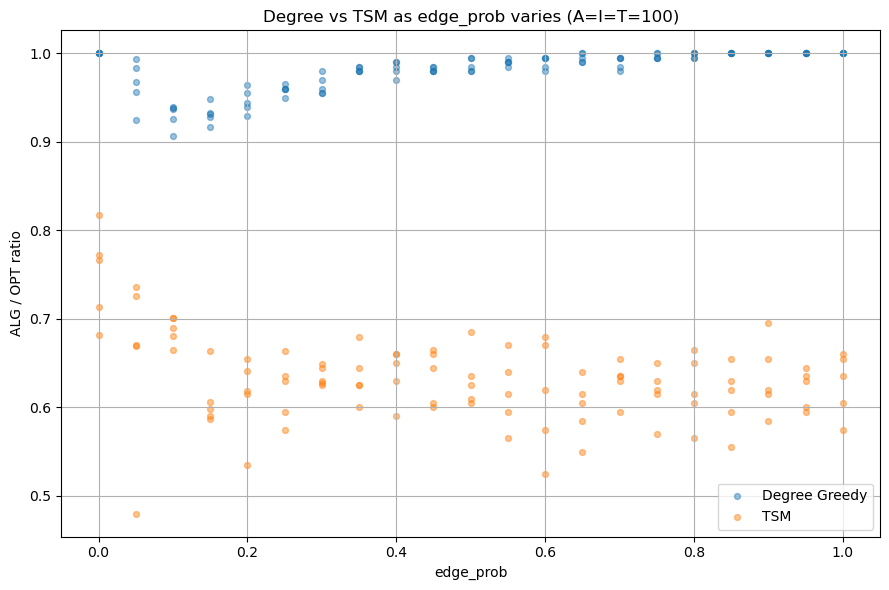

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

A_size = 40
I_size = 40
T = 40     # Horizon = 100 arrivals

num_graphs_per_prob = 5
runs_per_graph = 2

edge_probs = np.linspace(0, 1, 21)  # 0, 0.05, ..., 1

probs_list = []
ratios_deg = []
ratios_tsm = []

for edge_prob in edge_probs:

    for _ in range(num_graphs_per_prob):

        neighbors = generate_random_graph(A_size, I_size, edge_prob)
        p = random_probability_vector(I_size)

        # -------- Degree Matching --------
        avg_ratio_deg, _ = simulate_many_runs_degree(
            A_size, I_size, neighbors, p, T, num_runs=runs_per_graph
        )

        # -------- TSM --------
        avg_ratio_tsm, _ = simulate_many_runs(
            A_size, I_size, neighbors, p, T, num_runs=runs_per_graph
        )

        probs_list.append(edge_prob)
        ratios_deg.append(avg_ratio_deg)
        ratios_tsm.append(avg_ratio_tsm)


# ---------- Plot ----------
plt.figure(figsize=(9, 6))

plt.scatter(probs_list, ratios_deg, s=18, alpha=0.45, label="Degree Greedy")
plt.scatter(probs_list, ratios_tsm, s=18, alpha=0.45, label="TSM")

plt.xlabel("edge_prob")
plt.ylabel("ALG / OPT ratio")
plt.title("Degree vs TSM as edge_prob varies (A=I=T=100)")
plt.grid(True)
plt.legend()
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()
